In [ ]:
 from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import os 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
gdrive_dir = "gdrive/My Drive/CS3244"
train_data_dir = os.path.join(gdrive_dir, "datasets/Train")
test_data_dir = os.path.join(gdrive_dir, "datasets/Test")
# train
subject_id_train_filepath = os.path.join(train_data_dir, "subject_id_train.txt")
X_train_filepath = os.path.join(train_data_dir, "X_train.txt")
y_train_filepath = os.path.join(train_data_dir, "y_train.txt")
# test
subject_id_test_filepath = os.path.join(test_data_dir, "subject_id_test.txt")
X_test_filepath = os.path.join(test_data_dir, "X_test.txt")
y_test_filepath = os.path.join(test_data_dir, "y_test.txt")
# features
features_filepath = os.path.join(gdrive_dir, "datasets/features.txt")

In [ ]:
with open(features_filepath, 'r') as tf:
    features = tf.read().split('\n')
features = features[:-1] # remove last newline

# Read train data into pd
subject_id_train = pd.read_csv(subject_id_train_filepath, header=None)
subject_id_test = pd.read_csv(subject_id_test_filepath, header=None)
X_train_df = pd.read_csv(X_train_filepath, header=None, delim_whitespace=True)
y_train_df = pd.read_csv(y_train_filepath, header=None)

X_train_df.columns = features
#X_train_df.insert(0, 'subject_id', subject_id_train)
y_train_df.shape

(7767, 1)

In [ ]:
# Read test data into pd
subject_id_test = pd.read_csv(subject_id_test_filepath, header=None)
X_test_df = pd.read_csv(X_test_filepath, header=None, delim_whitespace=True)
y_test_df = pd.read_csv(y_test_filepath, header=None)

X_test_df.columns = features
#X_test_df.insert(0, 'subject_id', subject_id_test)

In [ ]:
X_train_df.head()

tBodyAcc-Mean-1                  ...  tZAxisAcc-AngleWRTGravity-1    
0                         0.043580  ...                        -0.051718
1                         0.039480  ...                        -0.047436
2                         0.039978  ...                        -0.042271
3                         0.039785  ...                        -0.040826
4                         0.038758  ...                        -0.037080

[5 rows x 561 columns]

In [ ]:
frames = [X_train_df, X_test_df]
result = pd.concat(frames)
result

tBodyAcc-Mean-1                  ...  tZAxisAcc-AngleWRTGravity-1    
0                            0.043580  ...                        -0.051718
1                            0.039480  ...                        -0.047436
2                            0.039978  ...                        -0.042271
3                            0.039785  ...                        -0.040826
4                            0.038758  ...                        -0.037080
...                               ...  ...                              ...
3157                         0.052279  ...                         0.190104
3158                         0.073745  ...                         0.187748
3159                         0.068334  ...                         0.186527
3160                         0.023016  ...                         0.192865
3161                        -0.010846  ...                         0.193402

[10929 rows x 561 columns]

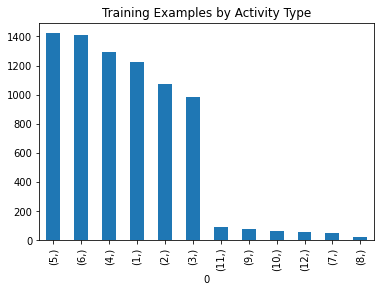

In [ ]:
# histogram visualization of training data
# we know there are 12 labels
y_train_df.value_counts().plot(kind='bar',
                          title='Training Examples by Activity Type')

From the above histogram, we observe that our data is highly imbalanced for labels concerning the transition of one position to the next compared to the labels for the positions. Even amongst the position labels, a small degree of imbalance can be observed; largest between position 3 and position 5.

Resampling may need to be considered.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()

result_transformed = sc.fit_transform(result)
result_transformed

array([[ 0.04229753, -0.04987031, -0.18730766, ..., -0.68490752,
         0.40378404, -0.00350964],
       [ 0.0020512 , -0.01173583, -0.1194426 , ..., -0.69185739,
         0.4049132 ,  0.01258021],
       [ 0.00693757, -0.04174955, -0.04670704, ..., -0.6999948 ,
         0.40604285,  0.03198754],
       ...,
       [ 0.28530967,  0.44474641, -0.06352887, ..., -0.32004781,
         0.71029105,  0.89169481],
       [-0.1595766 ,  0.33073808,  0.07595511, ..., -0.32860893,
         0.67885137,  0.91550876],
       [-0.49200392, -0.03162923, -0.21705211, ..., -0.32931876,
         0.67611038,  0.9175264 ]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
pca.fit(result_transformed)
reduced_result = pca.transform(result_transformed)

In [ ]:
pca.n_components_

106

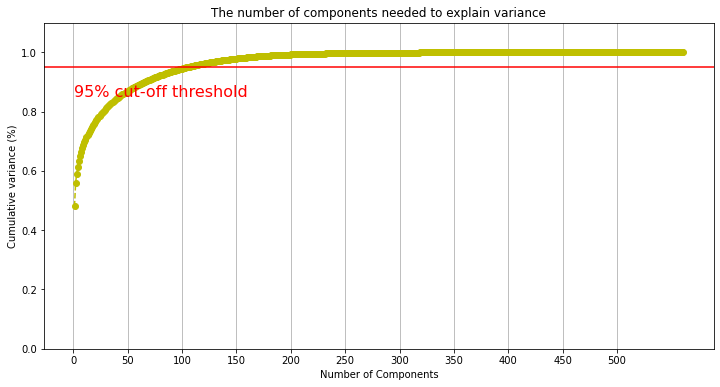

In [ ]:
pca = PCA().fit(result_transformed)

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 562, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='y')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 550, step=50)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Based on the graph, the interception between the threshold line and the number of components is around 100. This indicates that we need around 100 components to reach 0.95 accuracy.

In [ ]:
X_train_pca = reduced_result[0:7767]
X_test_pca = reduced_result[7767:]

In [ ]:
# from sklearn.model_selection import KFold

# kf = KFold(n_splits = 2)
# kf.get_n_splits(X_train_pca)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
scores = cross_val_score(model, X_train_pca, y_train_df, cv=6)
scores

array([0.93281853, 0.92123552, 0.87490347, 0.89644513, 0.9381762 ,
       0.93353941])

In [ ]:
model = LogisticRegression()
model.fit(X_train_pca, y_train_df)
accuracy = model.score(X_test_pca, y_test_df)
accuracy

0.91808981657179

In [ ]:
result_transformed

array([[ 0.04229753, -0.04987031, -0.18730766, ..., -0.68490752,
         0.40378404, -0.00350964],
       [ 0.0020512 , -0.01173583, -0.1194426 , ..., -0.69185739,
         0.4049132 ,  0.01258021],
       [ 0.00693757, -0.04174955, -0.04670704, ..., -0.6999948 ,
         0.40604285,  0.03198754],
       ...,
       [ 0.28530967,  0.44474641, -0.06352887, ..., -0.32004781,
         0.71029105,  0.89169481],
       [-0.1595766 ,  0.33073808,  0.07595511, ..., -0.32860893,
         0.67885137,  0.91550876],
       [-0.49200392, -0.03162923, -0.21705211, ..., -0.32931876,
         0.67611038,  0.9175264 ]])

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # for LDA analysis
lda = LDA()
X_lda = lda.fit_transform(result_transformed, pd.concat([y_train_df, y_test_df]))
X_lda.shape

(10929, 11)

In [ ]:
lda.explained_variance_ratio_

array([0.60434446, 0.19352183, 0.06733791, 0.0480909 , 0.03632435,
       0.02301555, 0.00981925, 0.00939083, 0.00361127, 0.00287996,
       0.00166369])

In [ ]:
lda_var_ratios = lda.explained_variance_ratio_

In [ ]:
X_train_lda = X_lda[0:7767]
X_test_lda = X_lda[7767:]

# model2 = LogisticRegression()
# model2.fit(X_train_lda, y_train_df)

In [ ]:
lda_model = LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear')
# scores = cross_val_score(lda_model, X_train_lda, y_train_df, cv=6)
# print("%f accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit

pipe = Pipeline([('classifier' , RandomForestClassifier())])
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()]}
]

clf = GridSearchCV(pipe, param_grid = param_grid, cv = TimeSeriesSplit(), verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train_lda, y_train_df)


Fitting 5 folds for each of 41 candidates, totalling 205 fits


In [ ]:
best_clf.best_estimator_.get_params()['classifier']

LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear')

In [ ]:
from sklearn import metrics

y_pred = clf.predict(X_test_lda)
labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING','STAND_TO_SIT','SIT_TO_STAND','SIT_TO_LIE','LIE_TO_SIT','STAND_TO_LIE','LIE_TO_STAND']
print(metrics.classification_report(y_test_df, y_pred, target_names=labels, digits=3))

                    precision    recall  f1-score   support

           WALKING      0.994     1.000     0.997       496
  WALKING_UPSTAIRS      1.000     0.996     0.998       471
WALKING_DOWNSTAIRS      1.000     1.000     1.000       420
           SITTING      0.963     0.919     0.941       508
          STANDING      0.933     0.973     0.952       556
            LAYING      1.000     1.000     1.000       545
      STAND_TO_SIT      1.000     0.913     0.955        23
      SIT_TO_STAND      0.909     1.000     0.952        10
        SIT_TO_LIE      0.816     0.969     0.886        32
        LIE_TO_SIT      0.913     0.840     0.875        25
      STAND_TO_LIE      0.977     0.857     0.913        49
      LIE_TO_STAND      0.857     0.889     0.873        27

          accuracy                          0.976      3162
         macro avg      0.947     0.946     0.945      3162
      weighted avg      0.977     0.976     0.976      3162



In [ ]:
from sklearn.model_selection import TimeSeriesSplit

def fc_val(model, X_train, y_train, n_split=5):
  tscv = TimeSeriesSplit(n_splits=n_split)
  scores = []
  for tr_index, val_index in tscv.split(X_train):
    X_tr, X_val = X_train[tr_index[0]:tr_index[-1] + 1], X_train[val_index[0]:val_index[-1] + 1]
    y_tr, y_val = y_train[tr_index[0]:tr_index[-1] + 1], y_train[val_index[0]:val_index[-1] + 1]
    model.fit(X_tr, y_tr)
    scores.append({'model': model, 'X_train': X_tr, 'y_train': y_tr, 'score': model.score(X_val, y_val)})
  return scores

In [ ]:
# too high of an n_split will give misleading score since val data becomes 1 row and accuracy is either 0 or 100
val_scores = fc_val(LogisticRegression(), X_train_lda, y_train_df, 8)

val_scores_accuracy = []
for i in val_scores:
  val_scores_accuracy.append(i['score'])

val_scores_accuracy

[0.947856315179606,
 0.9779837775202781,
 0.9640787949015064,
 0.9640787949015064,
 0.981460023174971,
 0.9791425260718424,
 0.9756662804171495,
 0.9907300115874855]

In [ ]:
lda_model.fit(X_train_lda, y_train_df)
y_pred = lda_model.predict(X_test_lda)
y_score = lda_model.predict_proba(X_test_lda)

import sklearn.metrics as metrics

print("Accuracy: ", metrics.accuracy_score( y_test_df, y_pred))
print("F1 macro: ", metrics.f1_score( y_test_df, y_pred, average="macro"))
print("F1 micro: ", metrics.f1_score(y_test_df, y_pred, average="micro"))
print("F1 weighted: ", metrics.f1_score(y_test_df, y_pred, average="weighted"))
print("Precision: ", metrics.precision_score(y_test_df, y_pred, average="macro"))
print("Precision: ", metrics.precision_score(y_test_df, y_pred, average="micro"))
print("Precision: ", metrics.precision_score(y_test_df, y_pred, average="weighted"))
print("Recall macro: ", metrics.recall_score(y_test_df, y_pred, average="macro"))
print("Recall micro: ", metrics.recall_score(y_test_df, y_pred, average="micro"))
print("Recall weighted: ", metrics.recall_score(y_test_df, y_pred, average="weighted"))

Accuracy:  0.976280834914611
F1 macro:  0.9451097988358517
F1 micro:  0.9762808349146109
F1 weighted:  0.9762455766690281
Precision:  0.9467870082337551
Precision:  0.976280834914611
Precision:  0.9768512974043742
Recall macro:  0.9463243217590037
Recall micro:  0.976280834914611
Recall weighted:  0.976280834914611
